<a href="https://colab.research.google.com/github/Chanita-Su/KKU_Data_Mining/blob/master/JOB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#เรื่อง การทำ Association เพื่อหาความสัมพันธ์ของการจัดหางาน

#####link for download dataset


*   https://www.kaggle.com/asrsaiteja/jobs-recommendation-dataset?select=job_clicks.csv

*   https://www.kaggle.com/asrsaiteja/jobs-recommendation-dataset?select=jobs.csv






In [64]:
import pandas as pd

In [65]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [66]:
path = '/content/drive/My Drive/DWDM_material'

In [67]:
import os

####1.ขั้นตอนในการเตรียมข้อมูล

In [68]:
JC = os.path.join(path,'job_clicks.csv')

In [69]:
JC_table = pd.read_csv(JC)

In [70]:
JC_table

userId  jobID  Clicks
0            1     31       3
1            1   1029      66
2            1   1061      93
3            1   1129       0
4            1   1172      77
...        ...    ...     ...
99999      671   6268      33
100000     671   6269      73
100001     671   6365      71
100002     671   6385       9
100003     671   6565      25

[100004 rows x 3 columns]

In [71]:
J = os.path.join(path,'jobs.csv')

In [72]:
J_table = pd.read_csv(J)
J_table

jobID job_category
0          1           IT
1          2           IT
2          3           IT
3          4           IT
4          5           IT
...      ...          ...
9120  162672    Marketing
9121  163056    Marketing
9122  163949    Marketing
9123  164977    Marketing
9124  164979    Marketing

[9125 rows x 2 columns]

#####รวมตารางโดยใช้คำสั่ง Merge

In [102]:
jj = pd.merge(JC_table,J_table,on='jobID')
jj

userId  jobID  Clicks job_category
0            1     31       3      Finance
1            7     31      71      Finance
2           31     31      39      Finance
3           32     31       4      Finance
4           36     31       2      Finance
...        ...    ...     ...          ...
99999      664  64997      16      Banking
100000     664  72380       7      Banking
100001     665    129       2           IT
100002     665   4736      18      Finance
100003     668   6425       3      Banking

[100004 rows x 4 columns]

#####เรียงลำดับ jobID โดยใช้คำสั่ง sort

In [74]:
jj.sort_values('jobID').head()

userId  jobID  Clicks job_category
31535     586      1      90           IT
31471     434      1      31           IT
31472     437      1      51           IT
31473     440      1      66           IT
31474     442      1      48           IT

In [75]:
jj.isnull().any()

userId          False
jobID           False
Clicks          False
job_category    False
dtype: bool

####2.ขั้นตอนการวิเคราะห์โดยการ association

In [76]:
asso = jj.groupby('userId')['job_category'].apply(list)
asso

userId
1      [Finance, HR, Management, Management, Manageme...
2      [IT, IT, Finance, Finance, Retail, Retail, Ret...
3      [IT, HR, IT, IT, HR, HR, HR, HR, Retail, Banki...
4      [Management, IT, IT, IT, Marketing, IT, IT, Ba...
5      [IT, Finance, IT, IT, IT, IT, IT, HR, HR, HR, ...
                             ...                        
667    [IT, IT, IT, IT, IT, IT, Banking, Banking, HR,...
668    [HR, HR, HR, HR, Management, Management, Marke...
669    [IT, Banking, Finance, Management, Retial, Mar...
670    [Finance, Retail, IT, IT, Finance, HR, HR, HR,...
671    [Marketing, Retail, HR, IT, IT, Finance, HR, H...
Name: job_category, Length: 671, dtype: object

In [77]:
!pip install apyori

In [78]:
from apyori import apriori

In [79]:
list(apriori(asso,min_support=0.9,min_confidence=0.99))

[RelationRecord(items=frozenset({'HR'}), support=0.9955290611028316, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'HR'}), confidence=0.9955290611028316, lift=1.0)]),
 RelationRecord(items=frozenset({'IT'}), support=0.9970193740685543, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'IT'}), confidence=0.9970193740685543, lift=1.0)]),
 RelationRecord(items=frozenset({'HR', 'Finance'}), support=0.9344262295081968, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Finance'}), items_add=frozenset({'HR'}), confidence=0.998407643312102, lift=1.0028915099736833)]),
 RelationRecord(items=frozenset({'IT', 'Finance'}), support=0.9344262295081968, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Finance'}), items_add=frozenset({'IT'}), confidence=0.998407643312102, lift=1.0013924195252921)]),
 RelationRecord(items=frozenset({'HR', 'IT'}), support=0.992548435171386, ordered_statistics=[OrderedStatistic(items

จากผลการ association ของ ประเภทของงาน กับ ชื่อผู้ใช้ พบว่า


*  ค่า support ที่เยอะที่สุด คือ .9 (หากเพิ่มมากกว่านี้จะไม่พบข้อมูล)
*  ค่า confidence ที่เยอะที่สุดคือ .99
*  โดยคนที่สนใจคลิ๊กงาน HR มีโอกาสที่จะคลิ๊กงาน IT ถึง 99%



####3.ปรับแก้ตามคอมเม้นอาจารย์

In [80]:
X = jj[['userId']]
y = jj[['Clicks']]

แบ่งจำนวนคลิ๊กเป็นกลุ่ม น้อย กลาง มาก เพื่อตัดกลุ่มจำนวนที่คลิ๊กน้อย กลาง ออก โดยKMeans

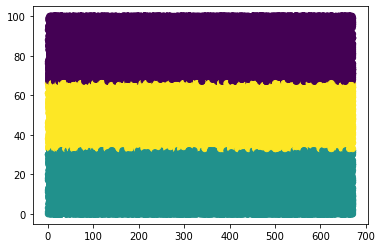

In [81]:
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
KMcluster = KMeans(n_clusters=3)
KMcluster.fit(y)
label = KMcluster.predict(y)
plt.scatter(X,y,c=label)

In [101]:
jj['clut'] = label
jj

userId  jobID  Clicks job_category  clut
0            1     31       3      Finance     1
1            7     31      71      Finance     0
2           31     31      39      Finance     2
3           32     31       4      Finance     1
4           36     31       2      Finance     1
...        ...    ...     ...          ...   ...
99999      664  64997      16      Banking     1
100000     664  72380       7      Banking     1
100001     665    129       2           IT     1
100002     665   4736      18      Finance     1
100003     668   6425       3      Banking     1

[100004 rows x 5 columns]

เปลี่ยนกลุ่มตัวเลขให้ น้อย=0 กลาง=1 มาก=2 ตามลำดับ

In [83]:
jj['clut']=jj['clut'].map({0:1,1:2,2:0})

In [84]:
clicks0 = jj[jj['clut']==0]
clicks0

userId   jobID  Clicks job_category  clut
2          31      31      39      Finance     0
7          88      31      41      Finance     0
9         110      31      57      Finance     0
11        150      31      60      Finance     0
13        165      31      65      Finance     0
...       ...     ...     ...          ...   ...
99988     656    3845      57    Marketing     0
99990     659     167      61           IT     0
99992     663  127124      61    Marketing     0
99997     663  138204      44    Marketing     0
99998     664   60832      33      Banking     0

[33620 rows x 5 columns]

In [85]:
clicks1 = jj[jj['clut']==1]
clicks1

userId   jobID  Clicks job_category  clut
1           7      31      71      Finance     1
5          39      31      73      Finance     1
8          96      31      95      Finance     1
10        111      31      90      Finance     1
14        186      31      77      Finance     1
...       ...     ...     ...          ...   ...
99987     656    1692      84           IT     1
99991     659     563     100           HR     1
99994     663  134528      91    Marketing     1
99995     663  134783      85    Marketing     1
99996     663  137595      79    Marketing     1

[33520 rows x 5 columns]

In [86]:
clicks2 = jj[jj['clut']==2]
clicks2

userId  jobID  Clicks job_category  clut
0            1     31       3      Finance     2
3           32     31       4      Finance     2
4           36     31       2      Finance     2
6           73     31      18      Finance     2
12         161     31       4      Finance     2
...        ...    ...     ...          ...   ...
99999      664  64997      16      Banking     2
100000     664  72380       7      Banking     2
100001     665    129       2           IT     2
100002     665   4736      18      Finance     2
100003     668   6425       3      Banking     2

[32864 rows x 5 columns]

###วิเคราะห์ association เพื่อดูประเภทของงานแต่ละกลุ่มว่าสอดคล้องตามจำนวนคลิ๊กหรือไม่

In [93]:
asso0=clicks0.groupby('Clicks')['job_category'].apply(list)
asso0

Clicks
33    [Management, Management, Management, Managemen...
34    [Finance, Management, Management, Management, ...
35    [Management, Management, Management, Managemen...
36    [IT, IT, IT, IT, IT, IT, Finance, Finance, Fin...
37    [HR, Management, Marketing, Finance, Retail, R...
38    [HR, Management, Management, Management, Manag...
39    [Finance, HR, Management, Management, IT, IT, ...
40    [Management, Management, Management, IT, IT, M...
41    [Finance, Finance, Finance, Management, Manage...
42    [Management, Management, Management, Managemen...
43    [Management, Management, Management, IT, IT, I...
44    [HR, Management, Management, Management, Manag...
45    [HR, Management, Management, Management, Manag...
46    [Finance, Management, Management, Management, ...
47    [Management, Management, Management, Managemen...
48    [HR, Management, Management, Management, Manag...
49    [Management, Management, IT, IT, IT, IT, Retai...
50    [Finance, HR, Management, Managemen

In [97]:
list(apriori(asso0,min_support=0.8,min_confidence=1))

[RelationRecord(items=frozenset({'Banking'}), support=1.0, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Banking'}), confidence=1.0, lift=1.0)]),
 RelationRecord(items=frozenset({'Business Intelligence'}), support=1.0, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Business Intelligence'}), confidence=1.0, lift=1.0)]),
 RelationRecord(items=frozenset({'Finance'}), support=1.0, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Finance'}), confidence=1.0, lift=1.0)]),
 RelationRecord(items=frozenset({'HR'}), support=1.0, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'HR'}), confidence=1.0, lift=1.0)]),
 RelationRecord(items=frozenset({'IT'}), support=1.0, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'IT'}), confidence=1.0, lift=1.0)]),
 RelationRecord(items=frozenset({'Management'}), support=1.0, ordered_statist

In [94]:
asso1=clicks1.groupby('Clicks')['job_category'].apply(list)
asso1

Clicks
67     [Management, Management, Management, Managemen...
68     [Finance, Finance, Management, Management, Man...
69     [Finance, Management, Management, Management, ...
70     [Management, Management, Management, Managemen...
71     [Finance, Management, Management, Management, ...
72     [Finance, Management, Management, Management, ...
73     [Finance, Management, Management, IT, IT, IT, ...
74     [Management, Management, Management, Managemen...
75     [HR, Management, Management, Management, Manag...
76     [Management, Management, Management, Managemen...
77     [Finance, Management, Management, Management, ...
78     [HR, Management, Management, Management, Manag...
79     [Management, Management, Management, Managemen...
80     [HR, Management, Management, Management, Retia...
81     [Finance, HR, Management, Management, Manageme...
82     [HR, Management, IT, IT, IT, IT, IT, IT, Retia...
83     [HR, Management, Management, IT, Marketing, IT...
84     [HR, Management, 

In [98]:
list(apriori(asso1,min_support=0.8,min_confidence=1))

[RelationRecord(items=frozenset({'Banking'}), support=1.0, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Banking'}), confidence=1.0, lift=1.0)]),
 RelationRecord(items=frozenset({'Business Intelligence'}), support=1.0, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Business Intelligence'}), confidence=1.0, lift=1.0)]),
 RelationRecord(items=frozenset({'Finance'}), support=1.0, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Finance'}), confidence=1.0, lift=1.0)]),
 RelationRecord(items=frozenset({'HR'}), support=1.0, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'HR'}), confidence=1.0, lift=1.0)]),
 RelationRecord(items=frozenset({'IT'}), support=1.0, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'IT'}), confidence=1.0, lift=1.0)]),
 RelationRecord(items=frozenset({'Management'}), support=1.0, ordered_statist

In [90]:
asso2=clicks2.groupby('Clicks')['job_category'].apply(list)
asso2

Clicks
0     [Finance, Management, Management, Management, ...
1     [Management, Management, Management, Managemen...
2     [Finance, Finance, Management, Management, Man...
3     [Finance, Management, Management, Management, ...
4     [Finance, Finance, Management, Management, Man...
5     [Management, Management, Management, Managemen...
6     [Finance, HR, Management, Management, Manageme...
7     [HR, Management, Management, Management, Manag...
8     [Management, Management, Management, Managemen...
9     [HR, HR, Management, Management, Management, M...
10    [HR, Management, Management, Management, Manag...
11    [Finance, HR, Management, IT, IT, IT, IT, Fina...
12    [Management, Management, Management, Managemen...
13    [Management, Management, Management, IT, IT, I...
14    [HR, Management, Retial, Marketing, Marketing,...
15    [Management, Management, Management, Managemen...
16    [Management, Management, Management, Managemen...
17    [Management, Management, Management

In [99]:
list(apriori(asso2,min_support=0.8,min_confidence=1))

[RelationRecord(items=frozenset({'Banking'}), support=1.0, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Banking'}), confidence=1.0, lift=1.0)]),
 RelationRecord(items=frozenset({'Business Intelligence'}), support=1.0, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Business Intelligence'}), confidence=1.0, lift=1.0)]),
 RelationRecord(items=frozenset({'Finance'}), support=1.0, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Finance'}), confidence=1.0, lift=1.0)]),
 RelationRecord(items=frozenset({'HR'}), support=1.0, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'HR'}), confidence=1.0, lift=1.0)]),
 RelationRecord(items=frozenset({'IT'}), support=1.0, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'IT'}), confidence=1.0, lift=1.0)]),
 RelationRecord(items=frozenset({'Management'}), support=1.0, ordered_statist

##สรุปผล


 

*   จากผลการ association 
โดยแบ่งตามกลุ่มจำนวนการคลิ๊ก น้อย=0 กลาง=1 มาก=2 จะเห็นได้ว่าค่า confidence ของทั้ง3กลุ่ม =1 แสดงว่ามีความสอดคล้องกัน 100% 
*   การวิเคราะห์ข้อมูลนี้ทำขึ้น เพื่อช่วยเพิ่มตัวเลือกในการจัดหางานให้กับคนที่สนใจสมัครงานนั้นมากขึ้น




####จัดทำโดย นางสาวชนิตา สุวภิรมย์โชติ 613020612-4 และ นางสาวสุรีรัตน์ สลางสิงห์ 613020245-5